참고문헌: 파이썬 딥러닝 파이토치 (이경택, 방성수, 안상준 지음), 정보문화사.

# 퍼셉트론 (Perceptron)
• Rosenblatt에의해 1957년 개발된 인공 신경망모형의 일종으로, feedforward
network 모형의 가장 간단한 형태인 선형 분류(linear classifier)모형

<figure>
<img src = "https://raw.githubusercontent.com/Hyun-chul/KAIA2022/main/Perceptron_1.png"/, height = 200, width = 550>
</figure>




• 퍼셉트론은 처음에 Weight를 랜덤하게 설정하고 모델의 오류를 점차 개선해가며 Weight를 개선해 나감

• 아래와 같은 학습 규칙에 의해 Weight가 Update 됨. 모든 데이터를 올바르게 분류 할 때까지 이 과정을 거침

$W_i \leftarrow W_i + \Delta  W_i,$

$ where   \Delta W_i = η(t-o)x_i,$ $ t = $ 실제 값 $, o = $ 예측 값

# 퍼셉트론 (Perceptron)의 한계
• 퍼셉트론은 선형 분류 모형의 형태를 가지고 있음. 그렇기 때문에 선형 문제밖에 풀지 못함.

• 비선형분류 문제는 풀지 못 한다라는 단점이 있음. 일정 오류를 허용하고 선을 그을 수 밖에 없음

<figure>
<img src = "https://raw.githubusercontent.com/Hyun-chul/KAIA2022/main/Perceptron_2.png"/, height = 260, width = 660>
</figure>


# 다층 퍼셉트론 (Multi Layer Perceptron, MLP)

퍼셉트론이 가지는 한계점을 극복하기 위해 여러Layer를 쌓아 올린 MLP가 등장하게 되었음.

<figure>
<img src = "https://raw.githubusercontent.com/Hyun-chul/KAIA2022/main/MLP_1.png"/, height = 200, width = 225>
</figure>

- 여러 개의 퍼셉트론의 조합과 그것들의 재조합으로 복잡한 비선형적인 모형을 만들어내는 것.

-  딥러닝의 기본 구조가 되는 신경망이라고 하면 기본적으로 MLP를 의미. MLP의 Hidden Layer를 쌓으면layer가 깊어지기(Deep) 때문에 딥러닝의 기본적인 모델이 됨.

- 위 그림은 Input, Hidde, Output 총 세 개의Layer로 연결되어 있는MLP이며, 각 원 하나는 노드(Node)라고 부름.

- Input Node의수는Input Data의 변수의 수가 되며 Hidden Layer와Hidden Node의 수는 사용자가 지정 해 주어야 할Hyperparameter임.

- Output Layer는 최종적으로 모델의 결과 값을 의미 하기 때문에 Output Node의 수는 풀고자하는 문제에 따라 달라짐. 예로, 회귀 분석을 하고자 하는 경우에는 Output Node의 수는 1이 되고, 0부터 9까지의 숫자 분류를 하고자 하는 경우에는 Output Node의 수는 10이 됨.


## MLP 학습 방법

- Feed Forward

    - 신경망의 Input에서 Weight와 Hidden을 거쳐 Output을 내보내는 과정

- Back Propagation

    - Feed Forward를 통해서 Input에서 Output까지 계산하며 Weight를 Update하는 과정
    
<figure>
<img src = "https://raw.githubusercontent.com/Hyun-chul/KAIA2022/main/MLP_2.png"/, height = 180, width = 700>
</figure>


- **자세한 내용(활성화 함수, feed forward&back propagation 계산 방법 등)은 아래 있는 교재, "KAIA2023_MLP.pdf"를 참고하세요.**
    

# 사람의 손글씨 데이터인 MNIST를 이용해 MLP 설계하기


0부터 9까지 사람의 손글씨 데이터인 MNIST를 이용해 기본적인 MLP 모델을 설계하겠습니다.
MLP 모델을 설계하는 순서는 다음과 같습니다.



1.   모듈 임포트하기
2.   딥러닝 모델을 설계할 때 활용하는 장비 확인하기
3.   MNIST 데이터 다운로드하기(train set, test set 분리하기)
4.   데이터 확인 (1)
5.   데이터 확인 (2)
6.   MLP 모델 설계하기
7.   Optimizer, Objective Function 설정하기
8.   MLP 모델학습을 진행하면서 학습 데이터에 대한 모델 성능을 확인하는 함수 정의
9.   학습되는 과정 속에서 검증 데이터에 대한 모델의 성능을 확인하는 함수 정의
10.  MLP 학습을 실행하면서 Train, Test set의 Loss 및 Test set accuracy 확인

In [ ]:
''' 1. Module Import '''
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets # 컴퓨터 비전 연구 분야에서 자유 이용하는 "torchvision" 모듈 내 "transforms" "datasets"을 임폴트 합니다.

파이토치 프레임워크를 이용해 딥러닝 모델을 설계할 때나 딥러닝 모델을 구성하고 있는 파라미터 값을 어베딩트 할때 이용하는 장비를 선택가능합니다. 만약 CUDA에서 GPU를 이용하고 있다면 'cuda', 이용하고 있지 않다면 'cpu'로 설정하시면 됩니다.

만약 GPU를 사용하고 있다면 계산 속도가 빠르기 때문에 딥러닝 모델의 파라미터 값을 빠르게 업데이트를 할 수 있습니다.

In [ ]:
''' 2. 딥러닝 모델을 설계할 때 활용하는 장비 확인 '''
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 1.11.0+cu113  Device: cuda


In [ ]:
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
''' 3. MNIST 데이터 다운로드 (Train set, Test set 분리하기) '''
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



Root: 데이터가 저장될 장소를 지정합니다.

Train: 대상 데이터가 MLP 모델을 학습하기 위해 이용하는 학습용 데이터인지, MLP 모델의 학습된 이후 성능을 검증하기 위한 검증용 데이터인지를 지정

Download: 해당 데이터를 인터넷상에서 다운로드해 이용할 것인지를 지정

Transform: 사람의 손글씨 데이터인 MNIST는 이미지 데이터입니다. 데이터를 다운로드할 때, 이미지 데이터에 대한 기본적인 전처리를 동시에 진행할 수 있습니다. 여기서는 'torch'모듈로 설계한 MLP의 Input으로 이용되기 때문에 "ToTensor()" 메서드를 이용하여 'Tensor'형태로 변경합니다.  

In [ ]:
''' 4. 데이터 확인하기 (1) '''
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


위의 코드에서 X는 for문에서 호출될 때는 (배치 크기 × 1 × 28 × 28)의 크기를 갖는 것을 확인 할 수 있습니다. 추후에 view를 옵션을 써서 (배치 크기 × 784)의 크기로 변환시킵니다.

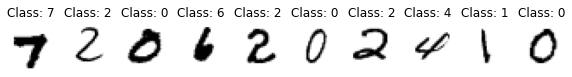

In [ ]:
''' 5. 데이터 확인하기 (2) '''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

In [ ]:
''' 6. Multi Layer Perceptron (MLP) 모델 설계하기 '''
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        x = x.view(-1, 28 * 28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [ ]:
''' 7. Optimizer, Objective Function 설정하기 '''
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [ ]:
''' 8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def train(model, train_loader, optimizer, log_interval):
    model.train()

    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image),
                len(train_loader.dataset), 100. * batch_idx / len(train_loader),
                loss.item()))

In [ ]:
''' 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def evaluate(model, test_loader):
    model.eval()

    train_loss = 0
    test_loss = 0
    train_correct = 0
    test_correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            test_correct += prediction.eq(label.view_as(prediction)).sum().item()

        test_loss /= (len(test_loader.dataset) / BATCH_SIZE)
        test_accuracy = 100. * test_correct / len(test_loader.dataset)

        for image, label in train_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            train_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            train_correct += prediction.eq(label.view_as(prediction)).sum().item()

        train_loss /= (len(train_loader.dataset) / BATCH_SIZE)
        train_accuracy = 100. * train_correct / len(train_loader.dataset)

    return test_loss, test_accuracy, train_loss, train_accuracy

In [ ]:
''' 10. MLP 학습 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기 '''
train_acc =[]
test_acc =[]

train_loss_all =[]
test_loss_all =[]

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy, train_loss, train_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

    train_loss_all.append(train_loss)
    test_loss_all.append(test_loss)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000 (0%)]	Train Loss: 2.364528
Train Epoch: 1 [6400/60000 (11%)]	Train Loss: 2.340068
Train Epoch: 1 [12800/60000 (21%)]	Train Loss: 2.312771
Train Epoch: 1 [19200/60000 (32%)]	Train Loss: 2.359066
Train Epoch: 1 [25600/60000 (43%)]	Train Loss: 2.267535
Train Epoch: 1 [32000/60000 (53%)]	Train Loss: 2.270675
Train Epoch: 1 [38400/60000 (64%)]	Train Loss: 2.295936
Train Epoch: 1 [44800/60000 (75%)]	Train Loss: 2.299665
Train Epoch: 1 [51200/60000 (85%)]	Train Loss: 2.261226
Train Epoch: 1 [57600/60000 (96%)]	Train Loss: 2.220792

[EPOCH: 1], 	Test Loss: 2.2427, 	Test Accuracy: 12.55 % 

Train Epoch: 2 [0/60000 (0%)]	Train Loss: 2.232673
Train Epoch: 2 [6400/60000 (11%)]	Train Loss: 2.248670
Train Epoch: 2 [12800/60000 (21%)]	Train Loss: 2.186026
Train Epoch: 2 [19200/60000 (32%)]	Train Loss: 2.100738
Train Epoch: 2 [25600/60000 (43%)]	Train Loss: 1.983132
Train Epoch: 2 [32000/60000 (53%)]	Train Loss: 1.910506
Train Epoch: 2 [38400/60000 (64%)]	Train Loss: 1.596283
T

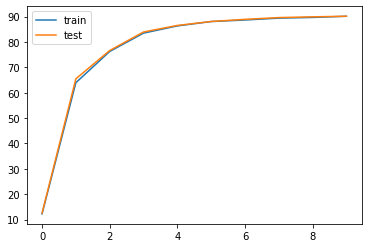

In [ ]:
plt.plot(train_acc, label = 'train')
plt.plot(test_acc, label = 'test')

plt.legend()
plt.show()

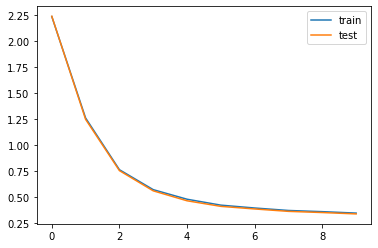

In [ ]:
plt.plot(train_loss_all, label = 'train')
plt.plot(test_loss_all, label = 'test')

plt.legend()
plt.show()